# CVRP

In [1]:
heuristicas = ['greedy', 'sweep', 'kmeans', 'savings']

### Librerías necesarias.

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import seaborn as sns

#from matplotlib import cm
#from matplotlib.colors import ListedColormap

sns.set_style("darkgrid")  #, {'axes.grid' : False})

### Paleta de 24 colores diferentes, hasta 192.

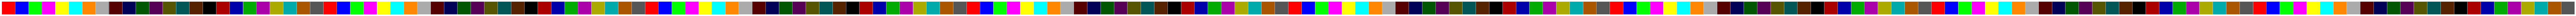

In [3]:
colores = []

#Originales:
colores = colores + ["#FF0000", "#0000FF", "#00FF00", "#FF00FF", "#FFFF00", "#00FFFF", "#FF8800", "#AAAAAA"]
colores = colores + ["#550000", "#000055", "#005500", "#550055", "#555500", "#005555", "#552200", "#000000"]
colores = colores + ["#AA0000", "#0000AA", "#00AA00", "#AA00AA", "#AAAA00", "#00AAAA", "#AA5500", "#555555"]

#Repitiendo:
colores = colores + ["#FF0000", "#0000FF", "#00FF00", "#FF00FF", "#FFFF00", "#00FFFF", "#FF8800", "#AAAAAA"]
colores = colores + ["#550000", "#000055", "#005500", "#550055", "#555500", "#005555", "#552200", "#000000"]
colores = colores + ["#AA0000", "#0000AA", "#00AA00", "#AA00AA", "#AAAA00", "#00AAAA", "#AA5500", "#555555"]
colores = colores + ["#FF0000", "#0000FF", "#00FF00", "#FF00FF", "#FFFF00", "#00FFFF", "#FF8800", "#AAAAAA"]
colores = colores + ["#550000", "#000055", "#005500", "#550055", "#555500", "#005555", "#552200", "#000000"]
colores = colores + ["#AA0000", "#0000AA", "#00AA00", "#AA00AA", "#AAAA00", "#00AAAA", "#AA5500", "#555555"]
colores = colores + ["#FF0000", "#0000FF", "#00FF00", "#FF00FF", "#FFFF00", "#00FFFF", "#FF8800", "#AAAAAA"]
colores = colores + ["#550000", "#000055", "#005500", "#550055", "#555500", "#005555", "#552200", "#000000"]
colores = colores + ["#AA0000", "#0000AA", "#00AA00", "#AA00AA", "#AAAA00", "#00AAAA", "#AA5500", "#555555"]
colores = colores + ["#FF0000", "#0000FF", "#00FF00", "#FF00FF", "#FFFF00", "#00FFFF", "#FF8800", "#AAAAAA"]
colores = colores + ["#550000", "#000055", "#005500", "#550055", "#555500", "#005555", "#552200", "#000000"]
colores = colores + ["#AA0000", "#0000AA", "#00AA00", "#AA00AA", "#AAAA00", "#00AAAA", "#AA5500", "#555555"]
colores = colores + ["#FF0000", "#0000FF", "#00FF00", "#FF00FF", "#FFFF00", "#00FFFF", "#FF8800", "#AAAAAA"]
colores = colores + ["#550000", "#000055", "#005500", "#550055", "#555500", "#005555", "#552200", "#000000"]
colores = colores + ["#AA0000", "#0000AA", "#00AA00", "#AA00AA", "#AAAA00", "#00AAAA", "#AA5500", "#555555"]
colores = colores + ["#FF0000", "#0000FF", "#00FF00", "#FF00FF", "#FFFF00", "#00FFFF", "#FF8800", "#AAAAAA"]
colores = colores + ["#550000", "#000055", "#005500", "#550055", "#555500", "#005555", "#552200", "#000000"]
colores = colores + ["#AA0000", "#0000AA", "#00AA00", "#AA00AA", "#AAAA00", "#00AAAA", "#AA5500", "#555555"]
colores = colores + ["#FF0000", "#0000FF", "#00FF00", "#FF00FF", "#FFFF00", "#00FFFF", "#FF8800", "#AAAAAA"]
colores = colores + ["#550000", "#000055", "#005500", "#550055", "#555500", "#005555", "#552200", "#000000"]
colores = colores + ["#AA0000", "#0000AA", "#00AA00", "#AA00AA", "#AAAA00", "#00AAAA", "#AA5500", "#555555"]

custom_palette = sns.set_palette(sns.color_palette(colores))
sns.palplot(sns.color_palette(colores))
sns.set_palette(custom_palette)

# Experimentos

### Control cualitativo de rutas generadas.

In [4]:
def gendf_grafico(heuristica, n, k):
    rows = []
    problem_file_name = 'instancias/Vrp-Set-A/A\A-n%i-k%i.vrp' % (n,k)
    results_file_name = 'experimentos/rutas_%s_n%i_k%i.out' % (heuristica,n,k)
    problem_lines = [line.rstrip('\n') for line in open(problem_file_name)]
    results_lines = [line.rstrip('\n') for line in open(results_file_name)]
    cantidad_de_rutas = int(results_lines[0])
    
    # Para cada ruta.
    for ruta in range(1, cantidad_de_rutas + 1):
        
        # Comienzo con el depósito.
        info_depot = problem_lines[7].split()
        x_depot = int(info_depot[1])
        y_depot = int(info_depot[2])
        rows.append([x_depot, y_depot, ruta, 0])
        
        # Guardo los nodos de la ruta.
        datos = results_lines[ruta].split()
        for nodo in range(0, len(datos)):
            id_nodo = int(datos[nodo])
            info_nodo = problem_lines[7 + (id_nodo - 1)].split()
            x = int(info_nodo[1])
            y = int(info_nodo[2])
            rows.append([x, y, ruta, nodo + 1])
        
        # Termino con el depósito.
        rows.append([x_depot, y_depot, ruta, nodo + 2])
    return pd.DataFrame(rows, columns=['X', 'Y', 'Ruta', 'Orden'])

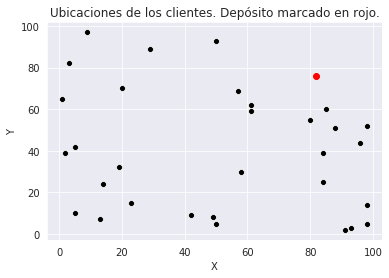

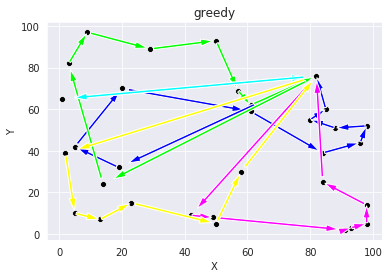

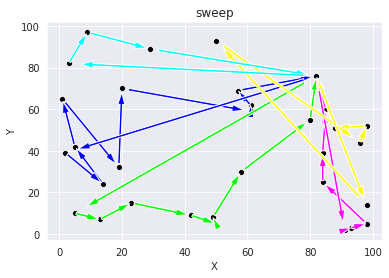

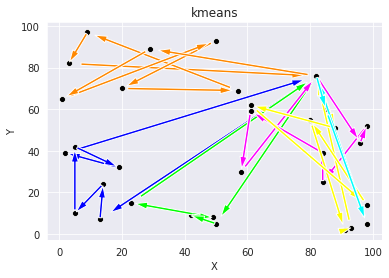

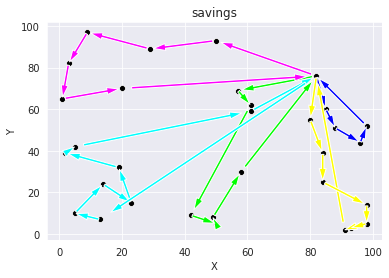

In [5]:
#for heuristica in heuristicas:
#    df_grafico = gendf_grafico(heuristica, 32, 5)
#    cantidad_de_rutas = df_grafico['Ruta'].max(axis = 0)
#    sns.lineplot(ci=None, sort = False, x=df_grafico['X'], linestyle='-', marker='o', y=df_grafico['Y'], hue=df_grafico['Ruta'], palette=sns.color_palette(n_colors=cantidad_de_rutas)).legend().set_visible(False)
#    plt.show()

df_grafico = gendf_grafico('greedy', 32, 5)
x_depot = df_grafico.at[0, 'X']
y_depot = df_grafico.at[0, 'Y']
sns.scatterplot(x = df_grafico['X'], y = df_grafico['Y'] , data = df_grafico, c = ['#000000']).plot(x_depot, y_depot, color = 'red', marker = 'o')
plt.title('Ubicaciones de los clientes. Depósito marcado en rojo.')
plt.show()

for heuristica in heuristicas:
    df_grafico = gendf_grafico(heuristica, 32, 5)
    cantidad_de_rutas = df_grafico['Ruta'].max(axis = 0)
    cantidad_de_indices = df_grafico.size / len(df_grafico.columns)
    sns.scatterplot(x = df_grafico['X'], y = df_grafico['Y'] , data = df_grafico, c = ['#000000'])
    indice = 0
    for ruta in range(1, cantidad_de_rutas + 1):
        while indice < int(cantidad_de_indices - 1):
            if df_grafico.at[indice, 'Ruta'] != df_grafico.at[indice + 1, 'Ruta']:
                break
            x = df_grafico.at[indice, 'X']
            y = df_grafico.at[indice, 'Y']
            x2 = df_grafico.at[indice + 1, 'X']
            y2 = df_grafico.at[indice + 1, 'Y']
            plt.annotate('', xy=(x,y), xytext=(x2,y2), arrowprops=dict(facecolor=colores[ruta], shrink=0.05, headwidth=7, width=2.5))
            indice += 1
        indice += 1
    plt.title(heuristica)
    plt.show()

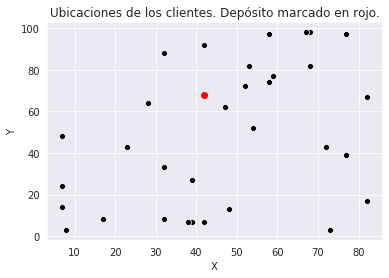

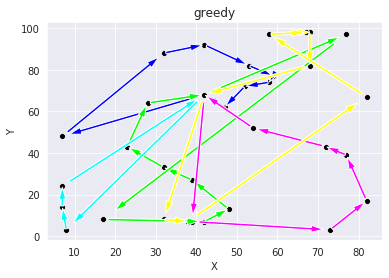

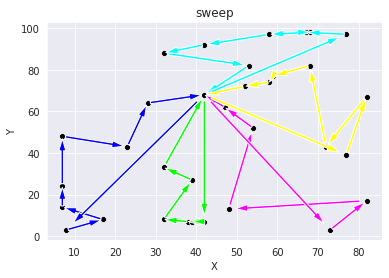

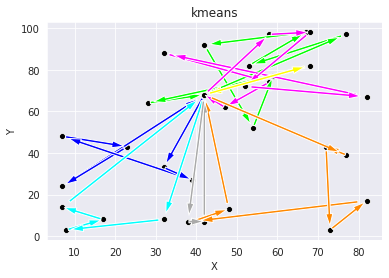

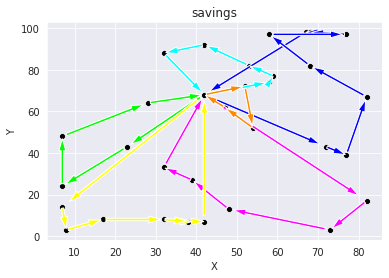

In [6]:
#for heuristica in heuristicas:
#    df_grafico = gendf_grafico(heuristica, 33, 5)
#    cantidad_de_rutas = df_grafico['Ruta'].max(axis = 0)
#    sns.lineplot(ci=None, sort = False, x=df_grafico['X'], linestyle='-', marker='o', y=df_grafico['Y'], hue=df_grafico['Ruta'], palette=sns.color_palette(n_colors=cantidad_de_rutas)).legend().set_visible(False)
#    plt.show()

df_grafico = gendf_grafico('greedy', 33, 5)
x_depot = df_grafico.at[0, 'X']
y_depot = df_grafico.at[0, 'Y']
sns.scatterplot(x = df_grafico['X'], y = df_grafico['Y'] , data = df_grafico, c = ['#000000']).plot(x_depot, y_depot, color = 'red', marker = 'o')
plt.title('Ubicaciones de los clientes. Depósito marcado en rojo.')
plt.show()

for heuristica in heuristicas:
    df_grafico = gendf_grafico(heuristica, 33, 5)
    cantidad_de_rutas = df_grafico['Ruta'].max(axis = 0)
    cantidad_de_indices = df_grafico.size / len(df_grafico.columns)
    sns.scatterplot(x = df_grafico['X'], y = df_grafico['Y'] , data = df_grafico, c = ['#000000'])
    indice = 0
    for ruta in range(1, cantidad_de_rutas + 1):
        while indice < int(cantidad_de_indices - 1):
            if df_grafico.at[indice, 'Ruta'] != df_grafico.at[indice + 1, 'Ruta']:
                break
            x = df_grafico.at[indice, 'X']
            y = df_grafico.at[indice, 'Y']
            x2 = df_grafico.at[indice + 1, 'X']
            y2 = df_grafico.at[indice + 1, 'Y']
            plt.annotate('', xy=(x,y), xytext=(x2,y2), arrowprops=dict(facecolor=colores[ruta], shrink=0.05, headwidth=7, width=2.5))
            indice += 1
        indice += 1
    plt.title(heuristica)
    plt.show()

### Tiempo en función de la cantidad de nodos.

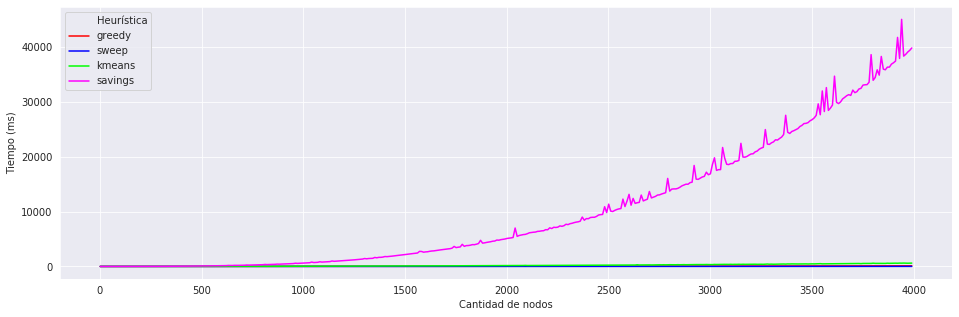

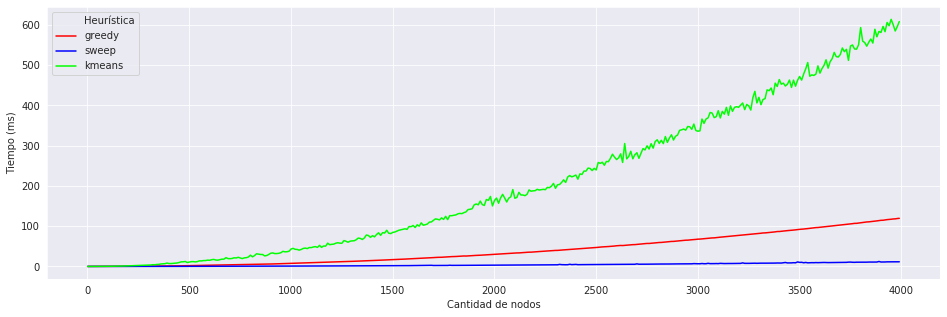

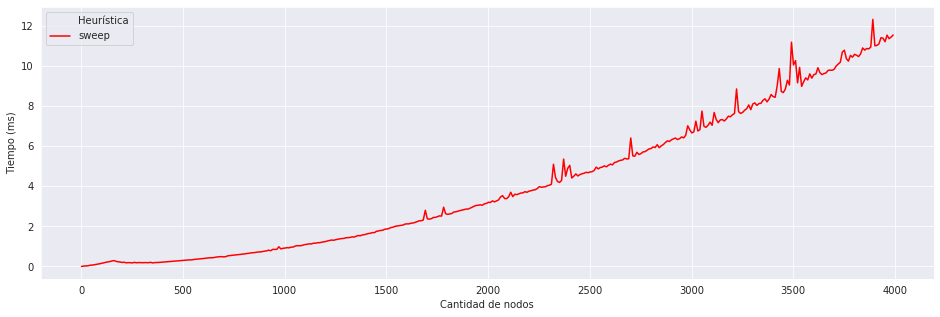

In [7]:
def gendf_tiempos_nodos():
    rows = []
    for heuristica in heuristicas:
        file_name = 'experimentos/nodos_%s.out' % (heuristica)
        lines = [line.rstrip('\n') for line in open(file_name)]
        for i in range(0, len(lines)):
            datos = lines[i].split()
            if len(datos) > 1:
                x = int(datos[0])
                tiempo = float(datos[1])
                rows.append([heuristica, x, tiempo])
    return pd.DataFrame(rows, columns=['Heurística', 'Cantidad de nodos', 'Tiempo (ms)'])

df_tiempos = gendf_tiempos_nodos()
plt.figure(figsize=(16, 5))
sns.lineplot(x=df_tiempos['Cantidad de nodos'], y=df_tiempos['Tiempo (ms)'], hue=df_tiempos['Heurística'])
#plt.ylabel('Tiempo (decenas de segundo)')
plt.show()

df_tiempos_no_savings = df_tiempos[df_tiempos['Heurística'] != 'savings']
plt.figure(figsize=(16, 5))
sns.lineplot(x=df_tiempos_no_savings['Cantidad de nodos'], y=df_tiempos_no_savings['Tiempo (ms)'], hue=df_tiempos_no_savings['Heurística'])
#plt.ylabel('Tiempo (decenas de segundo)')
plt.show()

df_tiempos_sweep = df_tiempos[df_tiempos['Heurística'] == 'sweep']
plt.figure(figsize=(16, 5))
sns.lineplot(x=df_tiempos_sweep['Cantidad de nodos'], y=df_tiempos_sweep['Tiempo (ms)'], hue=df_tiempos_sweep['Heurística'])
#plt.ylabel('Tiempo (decenas de segundo)')
plt.show()

El coeficiente de correlación de Pearson para Greedy es 0.9999932948375932.
El coeficiente de correlación de Pearson para Sweep es 0.9978680544062439.
El coeficiente de correlación de Pearson para K-Means es 0.999127006940481.
El coeficiente de correlación de Pearson para Savings es 0.9979404941760871.


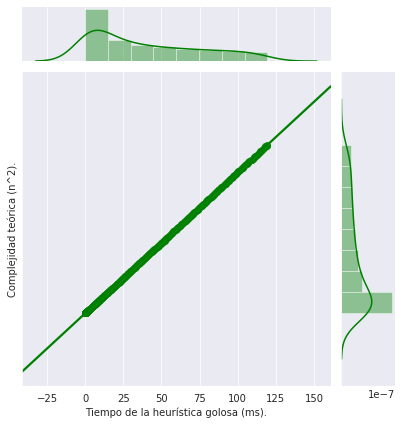

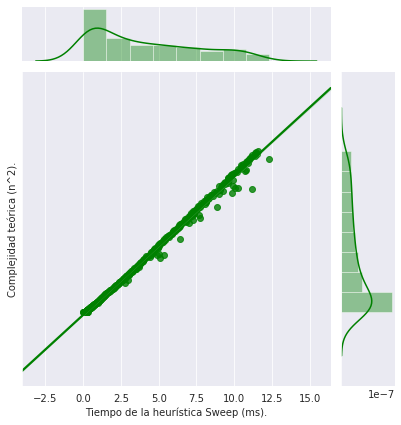

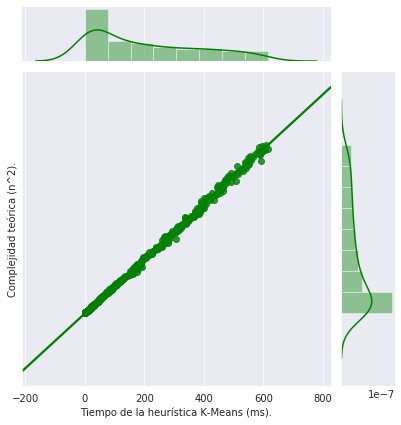

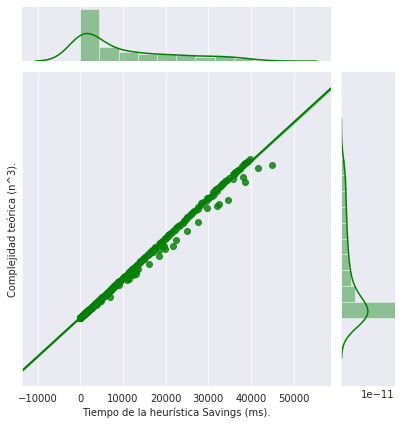

In [8]:
def gendf_correlacion(heuristica):
    rows = []
    file_name = 'experimentos/nodos_%s.out' % (heuristica)
    lines = [line.rstrip('\n') for line in open(file_name)]
    for i in range(0, len(lines)):
        datos = lines[i].split()
        if len(datos) > 1:
            nodos = int(datos[0])
            tiempo = float(datos[1])
            if heuristica == 'greedy':
                y = nodos**2
            elif heuristica == 'kmeans':
                y = nodos**2
            elif heuristica == 'savings':
                y = nodos**3
            elif heuristica == 'sweep':
                y = nodos**2
            rows.append([heuristica, nodos, tiempo, y])
    return pd.DataFrame(rows, columns=['Heurística', 'Nodos', 'Tiempo (ms)', 'Complejidad teórica'])

for heuristica in heuristicas:
    df_correlacion = gendf_correlacion(heuristica)

    sns.jointplot(data=df_correlacion, x='Tiempo (ms)', y='Complejidad teórica', kind='reg', color='g')
    
    if heuristica == 'greedy':
        plt.xlabel('Tiempo de la heurística golosa (ms).')
        plt.ylabel('Complejidad teórica (n^2).')
        
        r = np.corrcoef(df_correlacion['Complejidad teórica'], df_correlacion['Tiempo (ms)'])[0, 1]
        print('El coeficiente de correlación de Pearson para Greedy es '+ str(r) + '.')
    elif heuristica == 'sweep':
        plt.xlabel('Tiempo de la heurística Sweep (ms).')
        plt.ylabel('Complejidad teórica (n^2).')
        
        r = np.corrcoef(df_correlacion['Complejidad teórica'], df_correlacion['Tiempo (ms)'])[0, 1]
        print('El coeficiente de correlación de Pearson para Sweep es '+ str(r) + '.')
    elif heuristica == 'kmeans':
        plt.xlabel('Tiempo de la heurística K-Means (ms).')
        plt.ylabel('Complejidad teórica (n^2).')        
        
        r = np.corrcoef(df_correlacion['Complejidad teórica'], df_correlacion['Tiempo (ms)'])[0, 1]
        print('El coeficiente de correlación de Pearson para K-Means es '+ str(r) + '.')
    elif heuristica == 'savings':
        plt.xlabel('Tiempo de la heurística Savings (ms).')
        plt.ylabel('Complejidad teórica (n^3).')
        
        r = np.corrcoef(df_correlacion['Complejidad teórica'], df_correlacion['Tiempo (ms)'])[0, 1]
        print('El coeficiente de correlación de Pearson para Savings es '+ str(r) + '.')
    plt.yticks([])

### Tiempo en función de la capacidad de los vehículos.

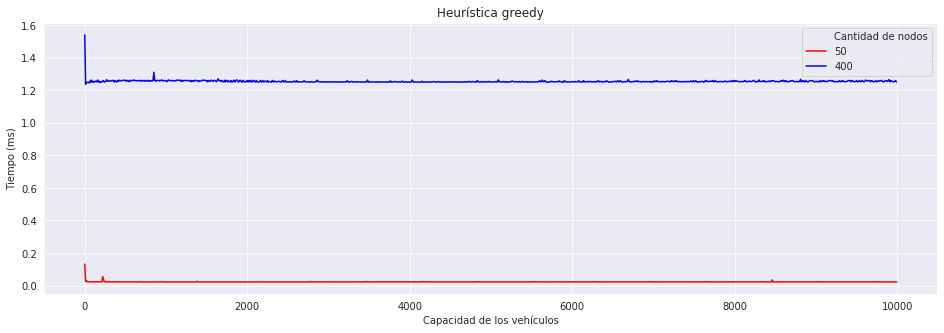

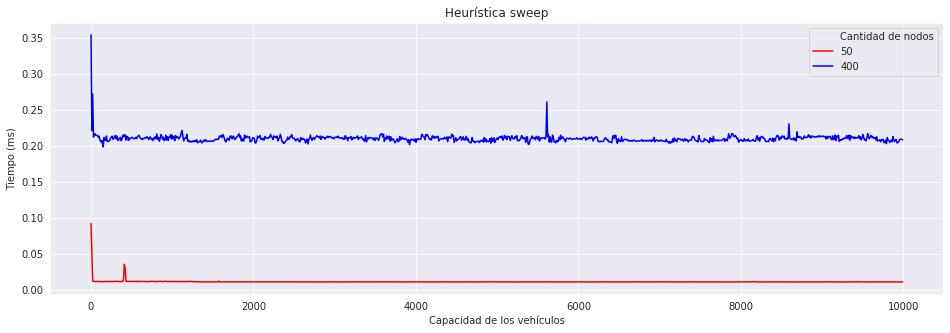

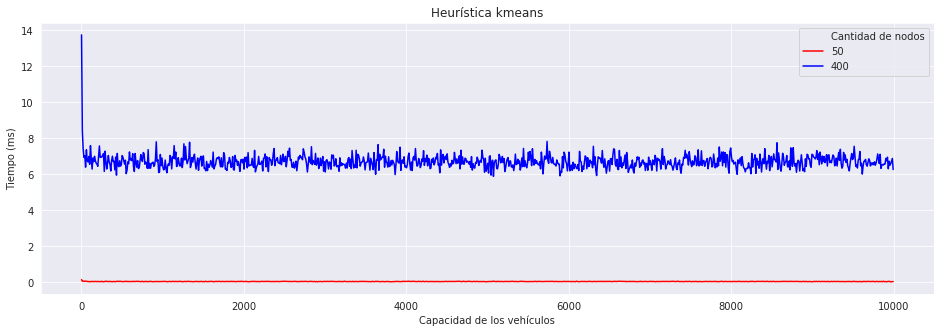

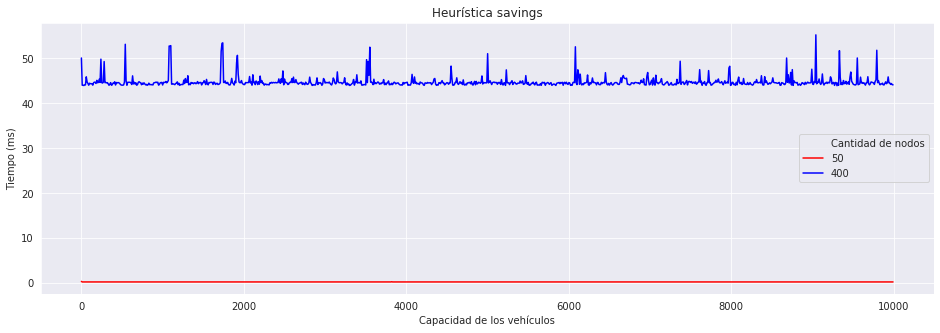

In [9]:
cantidades_de_nodos = [50, 400]

def gendf_tiempos_capacidad(heuristica):
    rows = []
    for nodos in cantidades_de_nodos:
        file_name = 'experimentos/capacidad_%s_%i.out' % (heuristica, nodos)
        lines = [line.rstrip('\n') for line in open(file_name)]
        for i in range(0, len(lines)):
            datos = lines[i].split()
            if len(datos) > 1:
                capacidad = int(datos[0])
                tiempo = float(datos[1])
                rows.append([nodos, capacidad, tiempo])
    return pd.DataFrame(rows, columns=['Cantidad de nodos', 'Capacidad de los vehículos', 'Tiempo (ms)'])

for heuristica in heuristicas:
    df_tiempos = gendf_tiempos_capacidad(heuristica)
    plt.figure(figsize=(16, 5))
    sns.lineplot(x=df_tiempos['Capacidad de los vehículos'], y=df_tiempos['Tiempo (ms)'], hue=df_tiempos['Cantidad de nodos'], palette=sns.color_palette(n_colors=len(cantidades_de_nodos)))
    #plt.ylabel('Tiempo (decenas de segundo)')
    titulo = 'Heurística %s' % (heuristica)
    plt.title(titulo)
    plt.show()

### Costo de caminos en función de la capacidad de los vehículos.

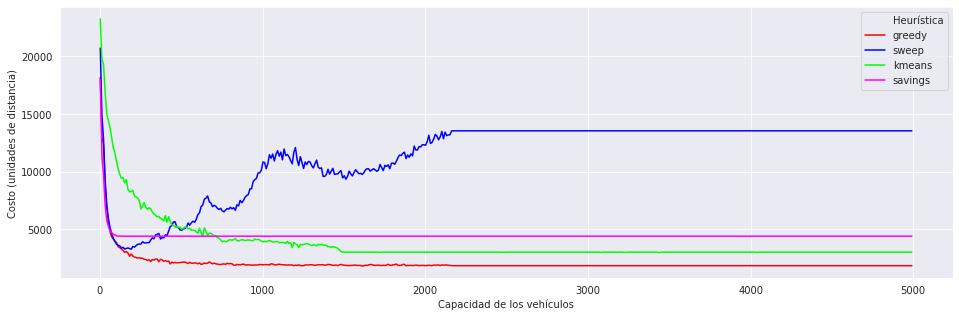

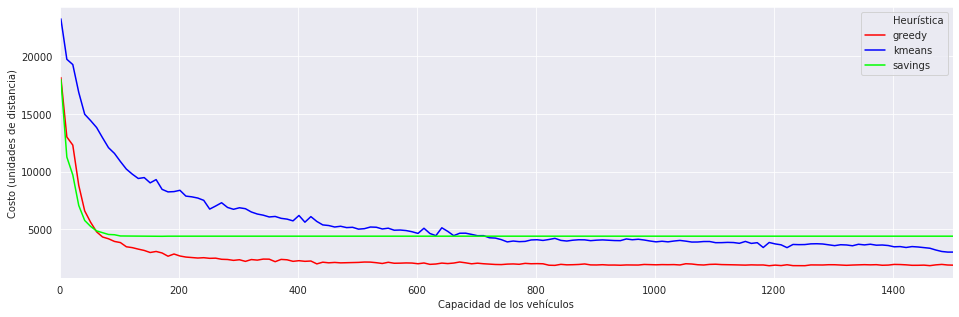

In [10]:
nodos = 400

def gendf_costos_capacidad():
    rows = []
    for heuristica in heuristicas:
        file_name = 'experimentos/capacidad_costo_%s_%i.out' % (heuristica, nodos)
        lines = [line.rstrip('\n') for line in open(file_name)]
        for i in range(0, len(lines)):
            datos = lines[i].split()
            if len(datos) > 1:
                capacidad = int(datos[0])
                costo = float(datos[1])
                rows.append([heuristica, nodos, capacidad, costo])
    return pd.DataFrame(rows, columns=['Heurística', 'Cantidad de nodos', 'Capacidad de los vehículos', 'Costo (unidades de distancia)'])

df_tiempos = gendf_costos_capacidad()
plt.figure(figsize=(16, 5))
sns.lineplot(x=df_tiempos['Capacidad de los vehículos'], y=df_tiempos['Costo (unidades de distancia)'], hue=df_tiempos['Heurística'])
#plt.ylabel('Tiempo (decenas de segundo)')
plt.show()

df_tiempos_bar_sweep = df_tiempos[df_tiempos['Heurística'] != 'sweep']
plt.figure(figsize=(16, 5))
sns.lineplot(x=df_tiempos_bar_sweep['Capacidad de los vehículos'], y=df_tiempos_bar_sweep['Costo (unidades de distancia)'], hue=df_tiempos_bar_sweep['Heurística'])
#plt.ylabel('Tiempo (decenas de segundo)')
plt.xlim(0,1500)
plt.show()

### Costo de caminos generados para instancias aleatorias.

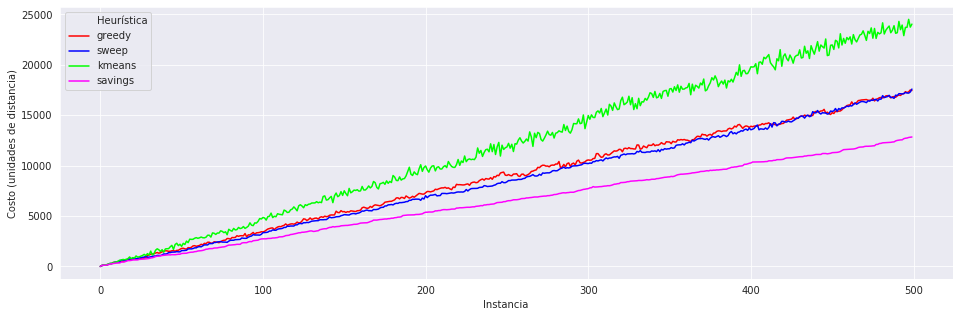

In [11]:
def gendf_costos_random():
    rows = []
    for heuristica in heuristicas:
        file_name = 'experimentos/costo_random_%s.out' % (heuristica)
        lines = [line.rstrip('\n') for line in open(file_name)]
        for instancia in range(0, len(lines)):
            datos = lines[instancia].split()
            if len(datos) > 1:
                costo = float(datos[1])
                rows.append([heuristica, instancia, costo])
    return pd.DataFrame(rows, columns=['Heurística', 'Instancia', 'Costo (unidades de distancia)'])

df_tiempos = gendf_costos_random()
plt.figure(figsize=(16, 5))
sns.lineplot(x=df_tiempos['Instancia'], y=df_tiempos['Costo (unidades de distancia)'], hue=df_tiempos['Heurística'])
#plt.ylabel('Tiempo (decenas de segundo)')
plt.show()

### Costo de caminos generados para instancias conocidas.

In [12]:
def gendf_costos_instancias(set_instancias):
    rows = []
    for heuristica in (heuristicas + ['optimal']):
        file_name = 'experimentos/costo_%s_%s.out' % (set_instancias, heuristica)
        lines = [line.rstrip('\n') for line in open(file_name)]
        for instancia in range(0, len(lines)):
            datos = lines[instancia].split()
            if len(datos) > 1:
                costo = float(datos[1])
                rows.append([heuristica, instancia, costo])
    return pd.DataFrame(rows, columns=['Heurística', 'Instancia', 'Costo (unidades de distancia)'])

def gendf_relacion_costos_instancias(set_instancias):
    rows = []
    opt_file_name = 'experimentos/costo_%s_optimal.out' % (set_instancias)
    opt_lines = [line.rstrip('\n') for line in open(opt_file_name)]
    for heuristica in (heuristicas):
        file_name = 'experimentos/costo_%s_%s.out' % (set_instancias, heuristica)
        lines = [line.rstrip('\n') for line in open(file_name)]
        for instancia in range(0, len(lines)):
            opt_datos = opt_lines[instancia].split()
            if len(opt_datos) > 1:
                opt_costo = float(opt_datos[1])
            datos = lines[instancia].split()
            if len(datos) > 1:
                costo = float(datos[1])
                costo = costo / opt_costo
                rows.append([heuristica, instancia, costo])
    return pd.DataFrame(rows, columns=['Heurística', 'Instancia', 'Costo de heurística sobre costo óptimo.'])

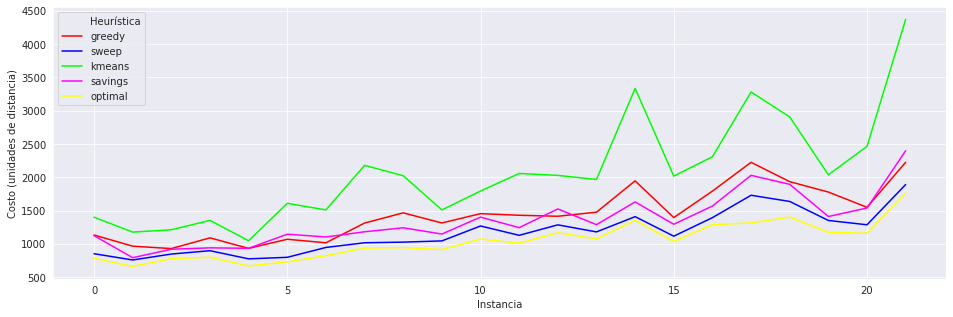

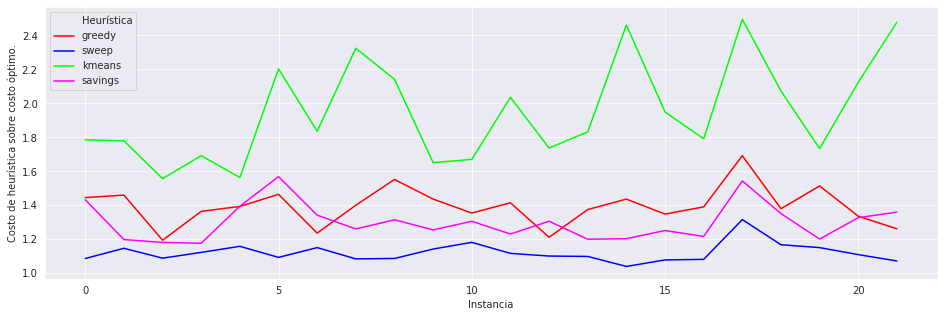

In [13]:
df_costos = gendf_costos_instancias('A')
plt.figure(figsize=(16, 5))
sns.lineplot(x=df_costos['Instancia'], y=df_costos['Costo (unidades de distancia)'], hue=df_costos['Heurística'])
#plt.ylabel('Tiempo (decenas de segundo)')
plt.show()

df_costos = gendf_relacion_costos_instancias('A')
plt.figure(figsize=(16, 5))
sns.lineplot(x=df_costos['Instancia'], y=df_costos['Costo de heurística sobre costo óptimo.'], hue=df_costos['Heurística'])
#plt.ylabel('Tiempo (decenas de segundo)')
plt.show()

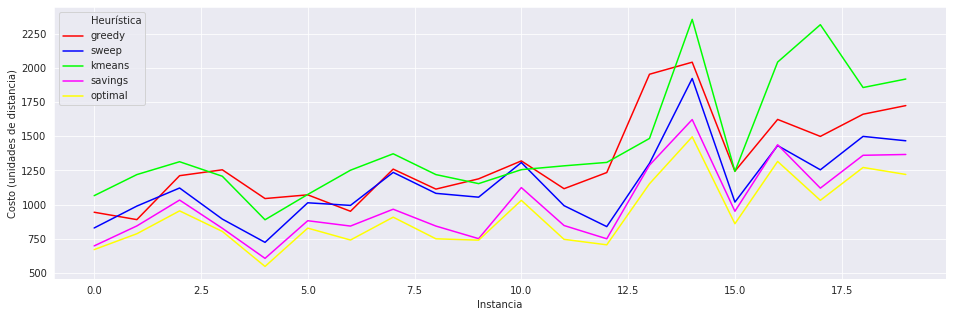

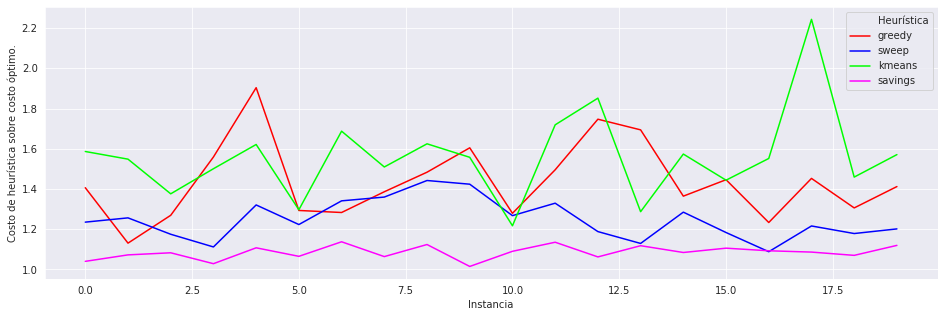

In [14]:
df_costos = gendf_costos_instancias('B')
plt.figure(figsize=(16, 5))
sns.lineplot(x=df_costos['Instancia'], y=df_costos['Costo (unidades de distancia)'], hue=df_costos['Heurística'])
#plt.ylabel('Tiempo (decenas de segundo)')
plt.show()

df_costos = gendf_relacion_costos_instancias('B')
plt.figure(figsize=(16, 5))
sns.lineplot(x=df_costos['Instancia'], y=df_costos['Costo de heurística sobre costo óptimo.'], hue=df_costos['Heurística'])
#plt.ylabel('Tiempo (decenas de segundo)')
plt.show()

### Costo generado con Simulated Annealing contra el costo de la heurística utilizada para inicializarlo.

In [15]:
def gendf_costos_annealing(set_instancias, heuristica_dada):
    rows = []
    for heuristica in ([heuristica_dada, 'optimal']):
        file_name = 'experimentos/costo_%s_%s.out' % (set_instancias, heuristica)
        lines = [line.rstrip('\n') for line in open(file_name)]
        for instancia in range(0, len(lines)):
            datos = lines[instancia].split()
            if len(datos) > 1:
                costo = float(datos[1])
                rows.append([heuristica, instancia, costo])
    annealing_file_name = 'experimentos/costo_%s_annealing_%s.out' % (set_instancias, heuristica_dada)
    annealing_lines = [line.rstrip('\n') for line in open(annealing_file_name)]
    for instancia in range(0, len(annealing_lines)):
        annealing_datos = annealing_lines[instancia].split()
        if len(annealing_datos) > 1:
            annealing_costo = float(annealing_datos[1])
            rows.append(['annealing', instancia, annealing_costo])
    return pd.DataFrame(rows, columns=['Heurística', 'Instancia', 'Costo (unidades de distancia)'])

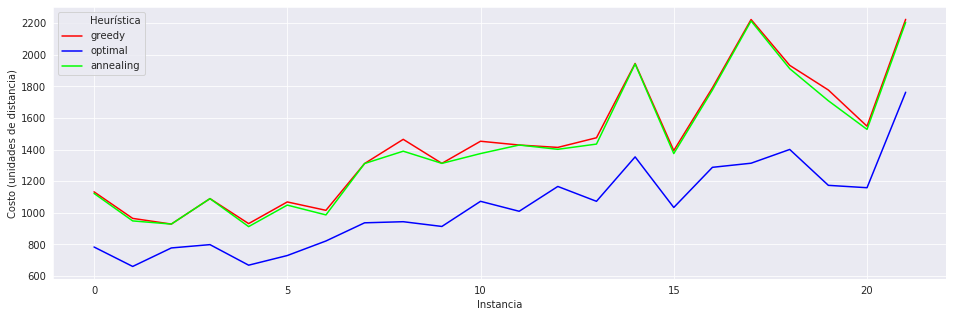

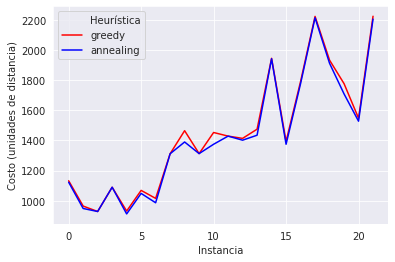

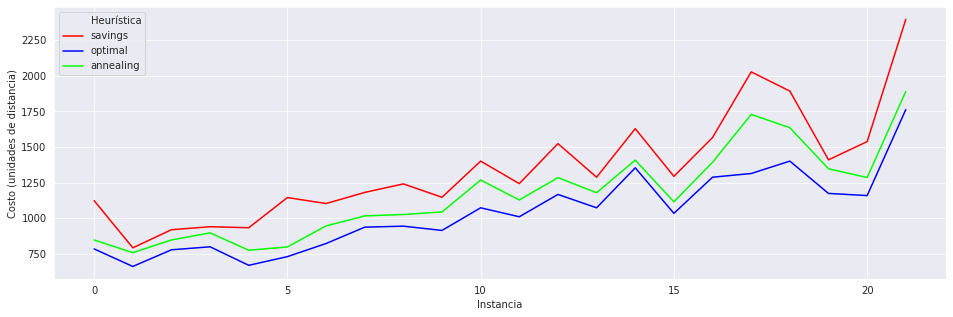

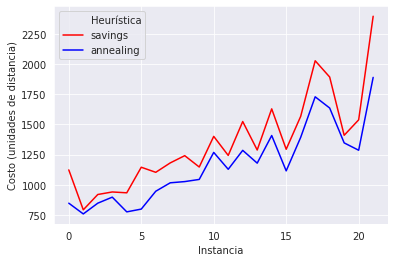

In [19]:
for heuristica in ['greedy', 'savings']:
    df_costos = gendf_costos_annealing('A', heuristica)
    #plt.figure(figsize=(16, 5))
    sns.lineplot(x=df_costos['Instancia'], y=df_costos['Costo (unidades de distancia)'], hue=df_costos['Heurística'])
    #plt.ylabel('Tiempo (decenas de segundo)')
    plt.show()
    
    df_costos_barOpt = df_costos[df_costos['Heurística'] != 'optimal']
    #plt.figure(figsize=(16, 5))
    sns.lineplot(x=df_costos_barOpt['Instancia'], y=df_costos_barOpt['Costo (unidades de distancia)'], hue=df_costos_barOpt['Heurística'])
    #plt.ylabel('Tiempo (decenas de segundo)')
    plt.show()